# 로지스틱 회귀

## KNN 알고리즘


### 데이터 준비

In [1]:
import pandas as pd 
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


### 종속변수 확인

In [2]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [3]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

### 독립변수의 형변환

In [4]:
fish_input = fish.iloc[:,1:].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:

fish_target = fish['Species'].to_numpy()


### 훈련 - 검증 데이터 분할

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(fish_input,fish_target,test_size=0.3,random_state=314)

### 표준화

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


### k-최근접 이웃 분류기

In [8]:
# k-최근접 이웃 분류기 : 클래스 확률을 계산하여 제공

from sklearn.neighbors import KNeighborsClassifier
knc= KNeighborsClassifier(n_neighbors=3)
knc.fit(x_train_scaled,y_train)

print(knc.score(x_train_scaled,y_train))
print(knc.score(x_test_scaled,y_test))


0.8558558558558559
0.8125


In [9]:
print(knc.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [10]:
print(knc.predict(x_test_scaled[:5]))

['Pike' 'Perch' 'Roach' 'Perch' 'Parkki']


### 클래스에 속할 확률

In [11]:
import numpy as np
proba = knc.predict_proba(x_test_scaled[:5])
print(np.round(proba,decimals=5))

[[0.      0.      0.      1.      0.      0.      0.     ]
 [0.      0.      1.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      1.      0.      0.     ]
 [0.      0.      0.66667 0.      0.33333 0.      0.     ]
 [0.33333 0.66667 0.      0.      0.      0.      0.     ]]


## 로지스틱 회귀

### 시그묑드 함수

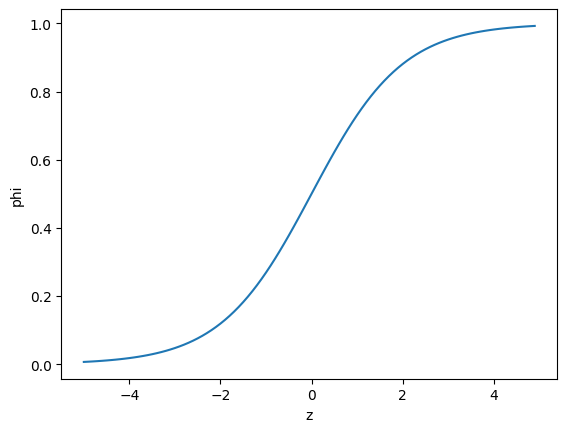

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [13]:
y_train

array(['Pike', 'Perch', 'Bream', 'Perch', 'Perch', 'Bream', 'Bream',
       'Roach', 'Perch', 'Bream', 'Bream', 'Bream', 'Roach', 'Pike',
       'Roach', 'Parkki', 'Perch', 'Perch', 'Parkki', 'Roach', 'Roach',
       'Bream', 'Bream', 'Bream', 'Perch', 'Roach', 'Perch', 'Bream',
       'Perch', 'Roach', 'Bream', 'Perch', 'Smelt', 'Parkki', 'Perch',
       'Whitefish', 'Perch', 'Smelt', 'Perch', 'Perch', 'Pike', 'Perch',
       'Bream', 'Bream', 'Smelt', 'Roach', 'Perch', 'Roach', 'Perch',
       'Whitefish', 'Pike', 'Perch', 'Parkki', 'Perch', 'Bream', 'Bream',
       'Perch', 'Whitefish', 'Smelt', 'Pike', 'Perch', 'Perch', 'Bream',
       'Bream', 'Bream', 'Pike', 'Perch', 'Perch', 'Pike', 'Smelt',
       'Perch', 'Pike', 'Perch', 'Smelt', 'Parkki', 'Perch', 'Perch',
       'Pike', 'Perch', 'Roach', 'Pike', 'Whitefish', 'Perch', 'Bream',
       'Roach', 'Perch', 'Smelt', 'Smelt', 'Parkki', 'Roach', 'Roach',
       'Parkki', 'Bream', 'Perch', 'Smelt', 'Perch', 'Parkki', 'Perch',
      

In [14]:
bream_smelt_index = (y_train == 'Bream')| (y_train == 'Smelt')

x_train_scaled = x_train_scaled[bream_smelt_index]
y_train = y_train[bream_smelt_index]


In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)


LogisticRegression()

In [16]:
print(lr.predict(x_train_scaled))


['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream'
 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Smelt'
 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream']


In [17]:
print(lr.predict_proba(x_train_scaled))

[[9.83441036e-01 1.65589636e-02]
 [9.90606889e-01 9.39311146e-03]
 [9.96393524e-01 3.60647625e-03]
 [9.99315134e-01 6.84866436e-04]
 [9.93398330e-01 6.60166970e-03]
 [9.99528504e-01 4.71495769e-04]
 [9.93901870e-01 6.09812975e-03]
 [9.97282785e-01 2.71721497e-03]
 [9.35453072e-01 6.45469278e-02]
 [9.97356177e-01 2.64382313e-03]
 [9.99136909e-01 8.63090933e-04]
 [7.43120362e-02 9.25687964e-01]
 [3.94675995e-02 9.60532400e-01]
 [9.59475179e-01 4.05248211e-02]
 [9.92664863e-01 7.33513653e-03]
 [3.32822640e-02 9.66717736e-01]
 [9.97265426e-01 2.73457360e-03]
 [9.94234629e-01 5.76537061e-03]
 [3.19091303e-02 9.68090870e-01]
 [9.92725413e-01 7.27458717e-03]
 [9.93182617e-01 6.81738327e-03]
 [9.84282972e-01 1.57170283e-02]
 [2.72996146e-02 9.72700385e-01]
 [2.26366232e-02 9.77363377e-01]
 [8.95103252e-01 1.04896748e-01]
 [3.38969114e-02 9.66103089e-01]
 [3.56423614e-02 9.64357639e-01]
 [9.84471210e-01 1.55287904e-02]
 [2.57828362e-02 9.74217164e-01]
 [9.70612090e-01 2.93879102e-02]
 [3.779169

In [18]:
print(lr.coef_,lr.intercept_)

[[-0.40771257 -0.61015572 -0.69401554 -1.01925495 -0.75465084]] [-1.94394103]


In [19]:
decisions = lr.decision_function(x_train_scaled)
print(decisions)

[-4.08413012 -4.65834118 -5.6214111  -7.28560162 -5.01380912 -7.65912882
 -5.09365635 -5.90542692 -2.67363846 -5.93288193 -7.05412704  2.52226427
  3.19200764 -3.16447179 -4.90771708  3.36888191 -5.89904144 -5.15010379
  3.41243377 -4.91606704 -4.98143884 -4.1371687   3.57320352  3.76528942
 -2.14396256  3.34994664  3.29792736 -4.14940891  3.63192523 -3.49734352
  3.23714164  3.18510709 -3.42614601 -3.88699363]


In [20]:
from scipy.special import expit
print(expit(decisions))

[1.65589636e-02 9.39311146e-03 3.60647625e-03 6.84866436e-04
 6.60166970e-03 4.71495769e-04 6.09812975e-03 2.71721497e-03
 6.45469278e-02 2.64382313e-03 8.63090933e-04 9.25687964e-01
 9.60532400e-01 4.05248211e-02 7.33513653e-03 9.66717736e-01
 2.73457360e-03 5.76537061e-03 9.68090870e-01 7.27458717e-03
 6.81738327e-03 1.57170283e-02 9.72700385e-01 9.77363377e-01
 1.04896748e-01 9.66103089e-01 9.64357639e-01 1.55287904e-02
 9.74217164e-01 2.93879102e-02 9.62208307e-01 9.60269968e-01
 3.14882544e-02 2.00948222e-02]


### 로지스틱 회귀로 다중 분류 

In [21]:
import pandas as pd 
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()
## xy 분리 
x = fish.iloc[:,1:]
y = fish[['Species']]
## 표준화
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

## 훈련 + 테스트 분할
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=324)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(111, 5) (48, 5) (111, 1) (48, 1)


In [22]:
lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))


0.9369369369369369
0.8541666666666666


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
print(lr.predict(x_test[:5]))

['Parkki' 'Perch' 'Smelt' 'Perch' 'Bream']


In [24]:
proba = lr.predict_proba(x_test[:5])
print(np.round(proba,decimals=3))

[[0.015 0.854 0.003 0.    0.099 0.    0.029]
 [0.038 0.    0.922 0.006 0.001 0.    0.033]
 [0.    0.003 0.124 0.    0.006 0.867 0.   ]
 [0.    0.002 0.67  0.002 0.305 0.    0.021]
 [1.    0.    0.    0.    0.    0.    0.   ]]


In [25]:
x.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [26]:
decision = lr.decision_function(x_test[:5])
print(np.round(decision,decimals=3))

[[  0.861   4.919  -0.581  -4.738   2.759  -4.744   1.523]
 [  4.996  -3.644   8.19    3.232   1.216 -18.853   4.863]
 [-10.239   1.35    5.228  -2.524   2.226   7.168  -3.21 ]
 [ -4.482  -1.098   4.836  -1.013   4.049  -3.651   1.359]
 [ 15.427   5.173  -3.058  -1.801   0.809 -22.684   6.133]]


In [27]:
from scipy.special import softmax
proba = softmax(decision,axis=1)
print(np.round(proba,decimals=3))

[[0.015 0.854 0.003 0.    0.099 0.    0.029]
 [0.038 0.    0.922 0.006 0.001 0.    0.033]
 [0.    0.003 0.124 0.    0.006 0.867 0.   ]
 [0.    0.002 0.67  0.002 0.305 0.    0.021]
 [1.    0.    0.    0.    0.    0.    0.   ]]


### 로지스틱 회귀로 확률 예측

In [28]:
import pandas as pd 
fish = pd.read_csv('https://bit.ly/fish_csv_data')


print(fish['Species'].unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [29]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [30]:
## 독립변수 - 종속변수 분리
x = fish.iloc[:,1:]
print(x[:5])
y = fish['Species']
print(y[:5])

   Weight  Length  Diagonal   Height   Width
0   242.0    25.4      30.0  11.5200  4.0200
1   290.0    26.3      31.2  12.4800  4.3056
2   340.0    26.5      31.1  12.3778  4.6961
3   363.0    29.0      33.5  12.7300  4.4555
4   430.0    29.0      34.0  12.4440  5.1340
0    Bream
1    Bream
2    Bream
3    Bream
4    Bream
Name: Species, dtype: object


In [31]:
## 훈련 - 테스트 분리
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=314)



In [32]:
## 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)



In [33]:
### knn으로 분류 예측

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))


0.8558558558558559
0.8125


In [34]:
print(knn.classes_)
print(knn.predict(x_test[:5]))


['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Pike' 'Perch' 'Roach' 'Perch' 'Parkki']


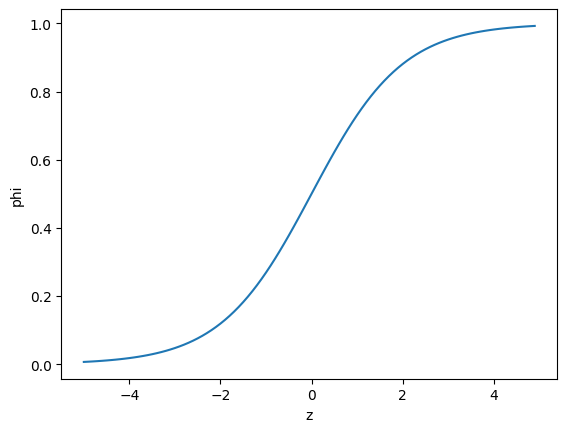

In [35]:
import numpy as np 
import matplotlib.pyplot as plt 
z= np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [36]:
y_train

128     Pike
76     Perch
13     Bream
79     Perch
116    Perch
       ...  
7      Bream
42     Roach
86     Perch
109    Perch
8      Bream
Name: Species, Length: 111, dtype: object

In [37]:
bream_smelt_index

array([False, False,  True, False, False,  True,  True, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
        True, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False,  True, False, False, False,  True,
        True,  True, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False, False,  True])

In [38]:
len(y_train)
x_train

array([[-5.09421650e-01,  4.14929397e-01,  3.62808195e-01,
        -7.60379993e-01, -5.57693897e-01],
       [-8.60496918e-01, -9.41835588e-01, -1.00846581e+00,
        -9.91752023e-01, -8.10958231e-01],
       [-1.31340591e-01,  3.87611981e-01,  5.73126295e-01,
         1.20980006e+00,  4.32493221e-01],
       [-8.33491128e-01, -7.96142704e-01, -8.65449505e-01,
        -7.44372826e-01, -7.47540049e-01],
       [ 1.38098364e+00,  1.02501835e+00,  9.18047978e-01,
         5.54332544e-01,  1.84472922e+00],
       [ 5.70809946e-01,  3.87611981e-01,  5.64713571e-01,
         1.45569187e+00,  4.89668768e-01],
       [ 8.40867845e-01,  6.60786139e-01,  8.42333462e-01,
         1.75933224e+00,  7.33656661e-01],
       [-6.44450599e-01, -5.22968546e-01, -4.86876926e-01,
        -7.04543784e-01, -3.36692907e-01],
       [-6.44450599e-01, -4.77439519e-01, -5.45765994e-01,
        -4.71401049e-01, -4.12771389e-01],
       [ 1.65104154e+00,  8.42902244e-01,  1.01900067e+00,
         2.40068134e+00

In [39]:
x_train

array([[-5.09421650e-01,  4.14929397e-01,  3.62808195e-01,
        -7.60379993e-01, -5.57693897e-01],
       [-8.60496918e-01, -9.41835588e-01, -1.00846581e+00,
        -9.91752023e-01, -8.10958231e-01],
       [-1.31340591e-01,  3.87611981e-01,  5.73126295e-01,
         1.20980006e+00,  4.32493221e-01],
       [-8.33491128e-01, -7.96142704e-01, -8.65449505e-01,
        -7.44372826e-01, -7.47540049e-01],
       [ 1.38098364e+00,  1.02501835e+00,  9.18047978e-01,
         5.54332544e-01,  1.84472922e+00],
       [ 5.70809946e-01,  3.87611981e-01,  5.64713571e-01,
         1.45569187e+00,  4.89668768e-01],
       [ 8.40867845e-01,  6.60786139e-01,  8.42333462e-01,
         1.75933224e+00,  7.33656661e-01],
       [-6.44450599e-01, -5.22968546e-01, -4.86876926e-01,
        -7.04543784e-01, -3.36692907e-01],
       [-6.44450599e-01, -4.77439519e-01, -5.45765994e-01,
        -4.71401049e-01, -4.12771389e-01],
       [ 1.65104154e+00,  8.42902244e-01,  1.01900067e+00,
         2.40068134e+00

In [40]:
### 로지스틱 회귀로 이진 분류 수행하기 

bream_smelt_index = (y_train == 'Bream') | (y_train == 'Smelt')

y_train_bin = y_train[bream_smelt_index]
x_train_bin = x_train[bream_smelt_index]




In [48]:
180
len(y_train_bin)

34

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_bin,y_train_bin)

print(lr.predict(x_train_bin))

print(lr.predict_proba(x_train_bin))


['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream'
 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Smelt'
 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream']
[[9.83441036e-01 1.65589636e-02]
 [9.90606889e-01 9.39311146e-03]
 [9.96393524e-01 3.60647625e-03]
 [9.99315134e-01 6.84866436e-04]
 [9.93398330e-01 6.60166970e-03]
 [9.99528504e-01 4.71495769e-04]
 [9.93901870e-01 6.09812975e-03]
 [9.97282785e-01 2.71721497e-03]
 [9.35453072e-01 6.45469278e-02]
 [9.97356177e-01 2.64382313e-03]
 [9.99136909e-01 8.63090933e-04]
 [7.43120362e-02 9.25687964e-01]
 [3.94675995e-02 9.60532400e-01]
 [9.59475179e-01 4.05248211e-02]
 [9.92664863e-01 7.33513653e-03]
 [3.32822640e-02 9.66717736e-01]
 [9.97265426e-01 2.73457360e-03]
 [9.94234629e-01 5.76537061e-03]
 [3.19091303e-02 9.68090870e-01]
 [9.92725413e-01 7.27458717e-03]
 [9.93182617e-01 6.81738327e-03]
 [9.84282972e-01 1.57170283e-0

In [50]:
print(lr.classes_)

['Bream' 'Smelt']


In [51]:
print(lr.coef_,lr.intercept_)

[[-0.40771257 -0.61015572 -0.69401554 -1.01925495 -0.75465084]] [-1.94394103]


In [53]:
decisions = lr.decision_function(x_train_bin[:5])
from scipy.special import expit
print(expit(decisions))

[0.01655896 0.00939311 0.00360648 0.00068487 0.00660167]


In [54]:
### 로지스틱 회귀로 다중 분류 수행하기

lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))


0.9099099099099099


In [55]:
print(lr.score(x_test,y_test))

0.9166666666666666


In [57]:
print(lr.predict(x_test[:5]))
proba = lr.predict_proba(x_test[:5])
print(np.round(proba,decimals=3))
print(lr.classes_)
print(lr.coef_,lr.intercept_)

decision = lr.decision_function(x_train_bin[:5])
from scipy.special import softmax
proba = softmax(decision)
print(np.round(proba,decimals=3))

['Pike' 'Perch' 'Roach' 'Roach' 'Parkki']
[[0.    0.    0.004 0.996 0.    0.    0.   ]
 [0.    0.012 0.817 0.    0.164 0.003 0.004]
 [0.004 0.078 0.305 0.003 0.545 0.    0.065]
 [0.    0.104 0.316 0.    0.555 0.015 0.01 ]
 [0.306 0.588 0.    0.    0.058 0.    0.048]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[-2.02910617 -0.40450445  2.94420383  7.41348157 -1.38707319]
 [-0.08289982 -1.97208885 -3.59052302  6.38765843 -1.86914094]
 [ 3.10107125  6.09677848 -8.55269536 -6.23783299  4.54813171]
 [-0.27083852  3.66875692  3.48555259 -2.43395451 -1.89918303]
 [-0.87967688 -6.04091206  4.97313688 -1.14075488  2.14632058]
 [-1.21297044  1.06527888  0.96226058 -5.27320747 -4.40083249]
 [ 1.37442058 -2.41330892 -0.2219355   1.28460984  2.86177737]] [-0.13385994  0.05334338  2.73927835 -0.26501866  2.56091441 -6.57305727
  1.61839973]
[[0.006 0.    0.    0.    0.    0.    0.   ]
 [0.008 0.    0.    0.    0.    0.    0.   ]
 [0.06  0.    0.    0.    0.    0.    0.   ]
 [0.92